# Github

In [1]:
# !pip install juanpy
import juanpy

# API de la FED

El link general de acceso a la API es: 
 * https://www.transparency.treasury.gov/

Para acceder a sus datos vamos a importar las librerías de siempre:

In [1]:
import requests, pandas as pd

### Tipos de interés promedio:

Este endpoint nos trae datos de las tasas de interés de la reserva federal

Les dejo función de como llamar a la API básica:

In [2]:
def getRates(limit=100):
    base = 'https://www.transparency.treasury.gov/services/api/fiscal_service/v1/'
    url = base + 'accounting/od/avg_interest_rates'
    params = {'sort':'-reporting_date', 'limit':limit}
    r = requests.get(url, params=params)
    js = r.json()
    df = pd.DataFrame(js['data'])
    return df    
data = getRates()

Como pueden ver, acepta como parámetro el orden y la cantidad "limit" de datos a devolver

Con la siguiente consulta vamos a traer los ultimos valores:

In [3]:
data = getRates()
ultimos = data.groupby('security_desc').avg_interest_rate_amt.first()
ultimos

security_desc
Domestic Series                                   8.044
Federal Financing Bank                            2.644
Foreign Series                                    7.312
Government Account Series                         2.261
Government Account Series Inflation Securities    1.257
Special Purpose Vehicle                           0.070
State and Local Government Series                 1.290
Total Interest-bearing Debt                       1.795
Total Marketable                                  1.661
Total Non-marketable                              2.231
Treasury Bills                                    0.207
Treasury Bonds                                    3.529
Treasury Floating Rate Note (FRN)                 0.261
Treasury Inflation-Protected Securities (TIPS)    0.693
Treasury Notes                                    1.898
United States Savings Inflation Securities        3.163
United States Savings Securities                  2.875
Name: avg_interest_rate_amt, dtype

In [4]:
df = getRates(limit=1000).set_index('reporting_date')

In [5]:
df = df.loc[df['security_desc'] == 'Treasury Bills', ['avg_interest_rate_amt']]

In [6]:
df = df.astype('float')
df.index = pd.to_datetime(df.index)

<AxesSubplot:xlabel='reporting_date'>

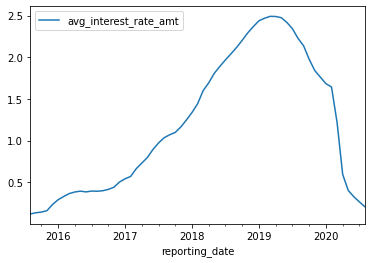

In [7]:
df.plot()